# The Sparks Foundation - GRIP - Data Science and Business Analytics(JUN'21)

# Task 2 : Prediction using Unsupervised ML

# Creator : Md. Hyder Siddiqui

### Dataset : iris dataset (Scikit-learn) - 
https://bit.ly/3kXTdox

### Programming language : Python

### Problem Statement :
#### > Predict the optimum no. of clusters and represent them visually.

In [1]:
#Import the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
#Read the data

data = pd.read_csv('Iris.csv')
data.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.shape

(150, 6)

In [7]:
data.describe() #Gives us all the neccesary statistics

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Check for duplicate values
print('No. of duplicated values :', data.duplicated().sum())

No. of duplicated values : 0


In [9]:
#Drop 'Id' column
data.drop('Id',axis=1,inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


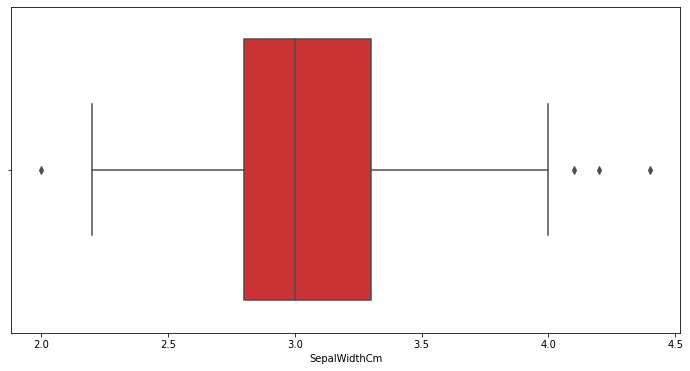

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='SepalWidthCm',data=data,palette='Set1')

In [13]:
x1,x2 = np.percentile(data['SepalWidthCm'],[25,75])
iqr = x2-x1
low_bound = x1 - (1.5*iqr)
upr_bound = x2 + (1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upr_bound if x>upr_bound
                                                  else low_bound if x<low_bound else x)

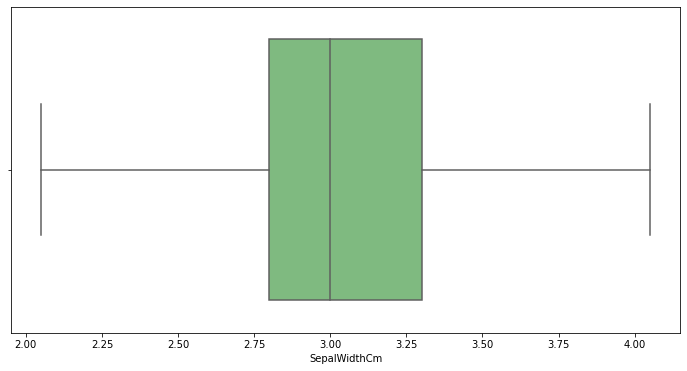

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data['SepalWidthCm'],palette='Greens_r')

In [15]:
#Correaltion Matrix
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.817954,-0.355582,0.962757,1.000000


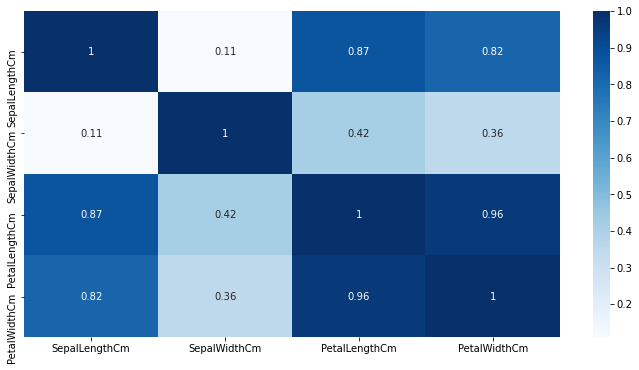

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(abs(data.corr()),cmap='Blues',annot=True)

### K-Means Clustering (Optimum No. of Clusters)

In [19]:
#Calculating the sum of squares in-cluster
within_cluster_sum_of_squares = []

cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km = km.fit(data.iloc[:,[0,1,2,3]])
    within_cluster_sum_of_squares.append(km.inertia_)

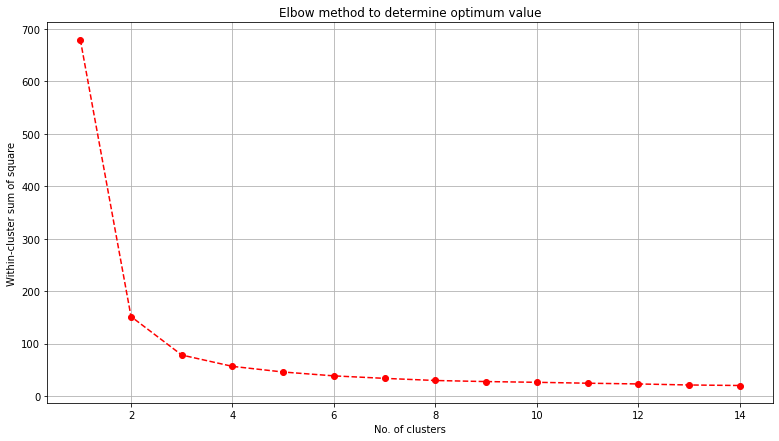

In [23]:
#Plotting the cluster range
plt.figure(figsize=(13,7))
plt.plot(cluster_range,within_cluster_sum_of_squares,'ro--',color='red')
plt.title('Elbow method to determine optimum value')
plt.xlabel('No. of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()

In [25]:
model = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
prediction = model.fit_predict(data.iloc[:,[0,1,2,3]])

### Visualizing the clusters

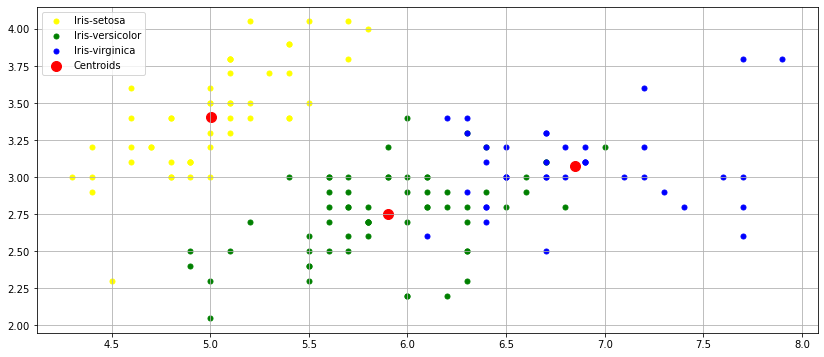

In [37]:
#Visualize
plt.figure(figsize=(14,6))
val = data.iloc[:,[0,1,2,3]].values
plt.scatter(val[prediction == 0,0],val[prediction == 0,1],s=25,c='yellow',label='Iris-setosa')
plt.scatter(val[prediction == 1,0],val[prediction == 1,1],s=25,c='green',label='Iris-versicolor')
plt.scatter(val[prediction == 2,0],val[prediction == 2,1],s=25,c='blue',label='Iris-virginica')

#Plot cluster centers
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.grid()
plt.legend()

## Thank You !